<a href="https://colab.research.google.com/github/PontusCanholm/poca1210-git-test/blob/main/exercises/SML-session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import graphviz

# Tree-Based Methods

## 8.1 Classification tree

This problem involves the `OJ` dataset (`data/oj.csv`)  
**Orange Juice Data**

The data contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. A number of characteristics of the customer and product are recorded.

A data frame with 1070 observations on the following 18 variables:

`Purchase` :A factor with levels CH and MM indicating whether the customer purchased Citrus Hill or Minute Maid Orange Juice  
`WeekofPurchase`: Week of purchase  
`StoreID`: Store ID  
`PriceCH`: Price charged for CH  
`PriceMM`: Price charged for MM  
`DiscCH`: Discount offered for CH
`DiscMM`: Discount offered for MM  
`SpecialCH`: Indicator of special on CH  
`SpecialMM`: Indicator of special on MM  
`LoyalCH`: Customer brand loyalty for CH  
`SalePriceMM`: Sale price for MM  
`SalePriceCH`: Sale price for CH  
`PriceDiff`: Sale price of MM less sale price of CH  
`Store7`: A factor with levels No and Yes indicating whether the sale is at Store 7  
`PctDiscMM`: Percentage discount for MM  
`PctDiscCH`: Percentage discount for CH  
`ListPriceDiff`: List price of MM less list price of CH  
`STORE`: Which of 5 possible stores the sale occured at

### a)
Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [ ]:
#OJ = pd.read_csv('data/OJ.csv')
OJ = pd.read_csv('https://uu-sml.github.io/course-sml-public/data/oj.csv')


In [ ]:
np.random.seed(1)
trainIndex = np.random.choice(OJ.shape[0], size=800, replace=False)
train = OJ.iloc[trainIndex]
test = OJ.iloc[~OJ.index.isin(trainIndex)]   # Här blir den 270 (resten)
# test = OJ.iloc[~trainIndex]           # Här blir den 800 (lika stor)

### b)
Learn a classification tree from the training data using the function `sklearn.tree.DecisionTreeClassifier()`, with
`Purchase` as the output and the other variables as inputs. Don't forget to handle qulitative variables correctly. To avoid severe overfit, you have to add some constraints to the tree, using, e.g., a maximum depth of 2 (`max_depth=2`).

In [ ]:
X_train = train.drop(columns=['Purchase'])
# Need to transform the qualitative variables to dummy variables
X_train = pd.get_dummies(X_train, columns=['Store7'])
y_train = train['Purchase']
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=2)

### c)
Use `sklearn.tree.export_graphviz()`and the `Python` module `graphviz` to visualize the tree and interpret the result. How many terminal nodes does the tree have? Pick one of the terminal nodes, and interpret the information displayed. Type `OJ.info()` to get information about all input variables in the data set.

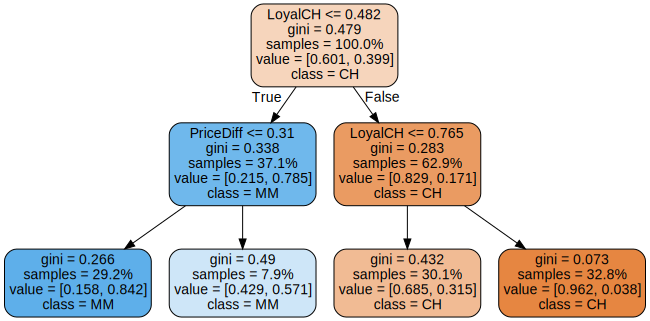

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=model.classes_, filled=True, rounded=True, leaves_parallel=True, proportion=True)
graph = graphviz.Source(dot_data)
graph

### d)
Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [ ]:
X_test = test.drop(columns=['Purchase'])
X_test = pd.get_dummies(X_test, columns=['Store7'])
y_test = test['Purchase']
y_predict = model.predict(X_test)
print('Accuracy rate is %.2f' % np.mean(y_predict == y_test))
pd.crosstab(y_predict, y_test)


Accuracy rate is 0.80


Purchase,CH,MM
row_0,,
CH,142,24
MM,30,74


### e)

Explore the different parameters you can pass to the tree command, such as `splitter`, `min_samples_split`, `min_samples_leaf`, `min_impurity_split` etc.

## 8.2 Random Forest

In this exercise we will use the email-spam data that has been presented in a couple of lectures. Go to the URL
http://archive.ics.uci.edu/ml/datasets/Spambase for more information about the data.

### a)
Load the dataset `data/email.csv`

In [5]:
# url = 'data/email.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/email.csv'
email = pd.read_csv(url)

### (b)
Create a training set containing a random sample of $75\%$ of the observations, and a test set containing the remaining observations.

In [6]:
np.random.seed(1)
trainIndex = np.random.choice(email.shape[0], size=int(len(email)*0.75), replace=False)
train = email.iloc[trainIndex]
test = email.iloc[~email.index.isin(trainIndex)]

### (c)
Fit a classification tree with `Class` as output. Compute the test error.

In [7]:
X_train = train.copy().drop(columns=['Class'])
y_train = train['Class']
X_test = test.copy().drop(columns=['Class'])
y_test = test['Class']

model = tree.DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(X=X_train, y=y_train)
y_predict = model.predict(X_test)
print('Test error rate is %.3f' % np.mean(y_predict != y_test))

Test error rate is 0.111


### (d)
Use the bagging approach to learn a classifier `sklearn.ensemble.BaggingClassifier()`. What test error do you get?

In [8]:
model = BaggingClassifier()
model.fit(X_train, y_train)
error = np.mean(model.predict(X_test) != y_test)
print('Test error: %.3f' % error)

Test error: 0.063


### (e)
Learn a random forest classifier using the function `sklearn.ensemble.RandomForestClassifier()`. What test error do you get?

In [9]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
error = np.mean(model.predict(X_test) != y_test)
print('Test error: %.3f' % error)

Test error: 0.036


## 8.3 Bootstrap

The bootstrap method has been introduced to reduce the variance in decision trees. However, the bootstrap method is widely applicable in other context as well, for example to estimate the variance in a parameter (cf. bias-variance tradeoff).

### (a)
Generate $n = 100$ samples $\{y_i\}_{i=1}^n$ from $\mathcal{N}(4, 1^2)$.

In [10]:
np.random.seed(0)
n = 100
y = np.random.normal(4, 1, n)

### (b)
We want to lean a model $y = \theta_0 + \epsilon$ (with $\mathbb{E}[\epsilon]=0$) from the data $\{y_i\}_{n=1}^n$. Estimate $\theta_0$ with least squares, i.e. $\hat{\theta}_0 = \frac{1}{n}\sum_{i=1}^n y_i$.

In [11]:
theta_0 = np.mean(y)
theta_0

4.059808015534485

### (c)
To estimate the variance in $\hat{\theta}_0$, $\operatorname{Var}[\hat{\theta}_0]$ (a possible ‘quality measure’ of an estimator), repeat (a)-(b) $1000$ times to get $1000$ estimates of $\theta_0$, which we call $\hat{\theta}_0^1, ..., \hat{\theta}_0^{1000}$. Plot a histogram over the estimates $\hat{\theta}_0^1, ..., \hat{\theta}_0^{1000}$.

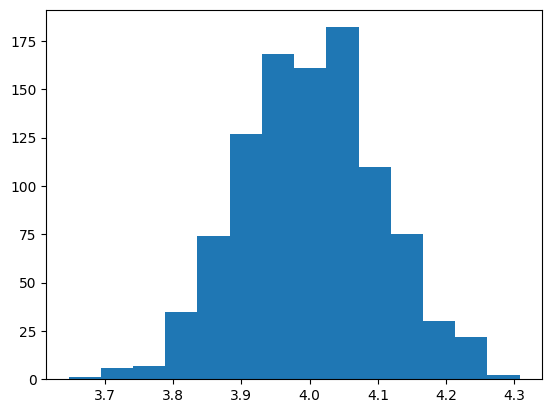

In [14]:
theta = []
for i in range(1000):
    theta.append(np.mean(np.random.normal(4,1,n)))

plt.hist(theta, bins=14)
plt.show()

In practice we only have access to $\{y_i\}_{n=1}^n$ $(n = 100)$ and cannot estimate $\hat{\theta}_0^1, ..., \hat{\theta}_0^{1000}$ by generating new data. However, with the bootstrap method we can obtain ‘new’ data sets by sampling from the original data set $\{y_i\}_{n=1}^n$.

### (d)
Sample $n$ indices $\{i_1, i_2, ... , i_n\}$ with replacement from the set $\{0, 1, ... , n-1\}$ using the function `numpy.random.choice()`. Note that some indices will appear multiple times and some will not appear at all.

In [15]:
indices = np.random.choice(np.arange(100), size=n, replace=True)
indices

array([77, 91, 78, 64, 51, 12, 89,  8, 33, 70, 35, 74, 84, 91, 74, 78, 75,
       80, 40, 35, 97, 56, 16, 38, 86, 80, 98, 63, 11, 53, 32, 30, 75, 44,
        7, 41, 97, 77, 60, 36, 63, 27, 61, 57, 66, 66, 48,  2, 25, 93, 56,
       78, 33, 71, 64, 14, 68, 25, 28, 26, 76, 22, 30, 23, 51, 16, 24, 27,
       74, 66, 80, 91, 43, 37,  6, 97, 91,  4, 83, 94, 62, 71,  1, 28, 64,
       45, 19,  0, 72, 11, 86, 59, 90, 41, 13, 78, 25, 30, 48, 28])

### (e)
Generate a ‘new’ data set $\{y_j\}_{j=1}^n$ based on the indices generated in (d) and estimate $\hat{\mu}$ from this data set.

In [16]:
y_new = y[indices]

### (f)
Repeat (d)-(e) $1000$ times to get $1000$ estimates of $\hat{\mu}$, which we call $\hat{\mu}_1^*, ..., \hat{\mu}_{1000}^*$. Plot a histogram over the estimates $\hat{\mu}_1^*, ..., \hat{\mu}_{1000}^*$ and compare with the estimate achieved in (c).

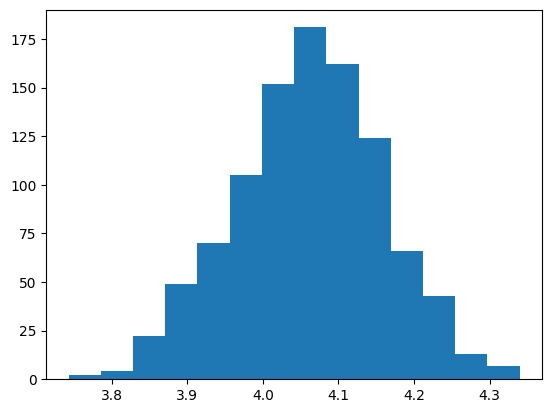

In [18]:
mu = []
for i in range(1000):
    y_new = np.random.choice(y, size=n, replace=True)
    mu.append(np.mean(y_new))

plt.hist(mu, bins=14)
plt.show()